In [1]:
# 日本語フォントをダウンロードする。
!pip install japanize-matplotlib &>/dev/null
from matplotlib import pylab as plt
import japanize_matplotlib
plt.rcParams["figure.dpi"]=200

import numpy as np
import pandas as pd

import pprint
import sklearn.linear_model

#全国の感染者数 オープンデータ
prefectures=['東京都','埼玉県','千葉県','神奈川県']
def loadNHKData():
    #出典: url='https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv'
    url='https://drive.google.com/u/0/uc?id=18N9GFnHjc3UPiSJQVJ6UJhzuRRZmJbDZ&export=download'
    df=pd.read_csv(url, index_col=0, usecols=[0,2,3], parse_dates=[0])

    # unstack
    df2=pd.DataFrame(index=df.index, columns=[])
    df2=df2.drop_duplicates()
    for pref in prefectures:
        dftmp=df[df['都道府県名'].str.startswith(pref)]
        dftmp=dftmp.rename(columns={'各地の感染者数_1日ごとの発表数': pref})
        dftmp=dftmp.drop(columns='都道府県名')
        #dftmp=dftmp.drop_duplicates()
        #pprint.pprint(dftmp)
        #pprint.pprint(df2)
        df2=pd.merge(df2,dftmp,left_index=True, right_index=True)
        #pprint.pprint(df2)
    return df2.sort_index().drop_duplicates()

data=loadNHKData()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


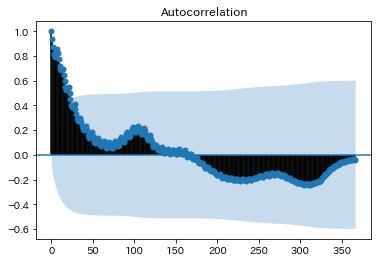

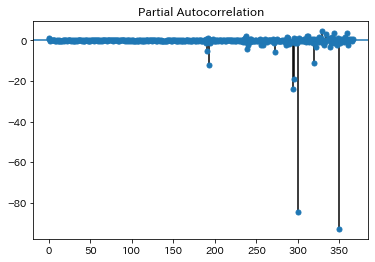

In [22]:
def serialcoefficient():
    import statsmodels.api as sm
    import requests
    import io
    sm.graphics.tsa.plot_acf(data['東京都'], lags=366)
    sm.graphics.tsa.plot_pacf(data['東京都'], lags=366)
    
serialcoefficient()

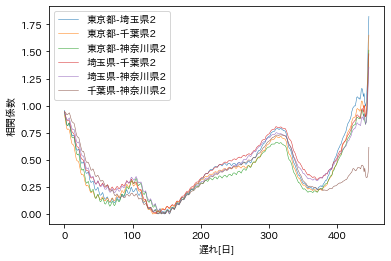

In [21]:
def crosscorrelation():
    cmat={}
    #X=np.append(X, data['埼玉県'].values.reshape(-1, 1),axis=1)
    #X=np.append(X, data['千葉県'].values.reshape(-1, 1),axis=1)

    #pprint.pprint(X)
    #pprint.pprint(Y)
    #cmat=np.corrcoef(X,Y)
    from statsmodels.tsa.stattools import ccf
    import itertools
    for pref in itertools.combinations(prefectures, 2):
        X=data[pref[0]].values
        X2=(X-X.mean())/X.std(ddof=1)
        Y=data[pref[1]].values
        Y2=(Y-Y.mean())/Y.std(ddof=1)
        cmat[pref[0]+"-"+pref[1]+"2"]=ccf(X,Y)
        cmat[pref[0]+"-"+pref[1]+"2"]=ccf(X2,Y2)
        #X=np.concatenate([data[pref[0]].values,np.zeros(np.int64(len(data)/2))])
        #Y=np.concatenate([np.zeros(np.int64(len(data)/2)), data[pref[1]].values])
        #cmat[pref[0]+"-"+pref[1]+"shift"]=ccf(X,Y)
    return cmat

cmatrix=crosscorrelation()

#pprint.pprint(cmatrix)
import seaborn as sns
#sns.heatmap(cmatrix.reshape(447,-1), annot=False)
for k, v in cmatrix.items():
    plt.plot(abs(v), label=k, linewidth=.5)
plt.xlabel("遅れ[日]")
plt.ylabel("相関係数")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
cmat2=data.corr()
sns.heatmap(cmat2, annot=True)
plt.show()